<a href="https://colab.research.google.com/github/thual/EXILCO-TrucsAstuces/blob/main/Atelier_Trucs_et_Astuces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trucs et astuces pour mettre en ligne des Jupyter Notebooks


> Atelier INP'CLUSION du 9 mai 2022 par Olivier THUAL


Premiers pas pour créer des Jupyter Notebooks, documents interactifs combinant du code, des équations, des visualisations et du texte.

*   [Exemples de Jupyter notebooks sur la page d'Olivier THUAL](http://thual.perso.enseeiht.fr/PagePro/co/JupyterNotebooks.html)

---
Pour commencer, exécutez les lignes de code Python ci-dessous à l'aide d'un simple clic ! 


In [ ]:
print("------------------------------------------")
print("Bienvenue à cet atelier `Trucs et astuces`")
print("------------------------------------------")

## Exemple de gif animé
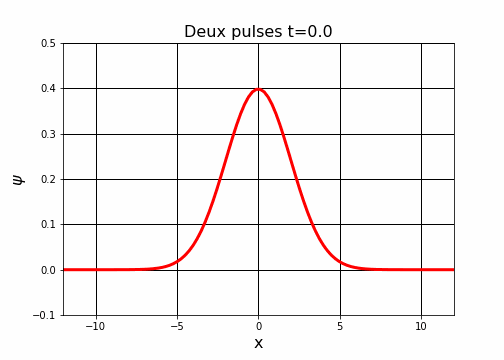

# Mettre en ligne ses programmes Python et ses « Jupyter notebooks »

À partir du fichier pdf suivant : [cliquer ici](http://thual.perso.enseeiht.fr/PagePro/res/211129-GitHubBinder-Colab.pdf)

Cliquez sur le triangle à gauche du titre pour dérouler les cellules masquées ci-dessous ou cliquez simplement sur ces cellules !

## Introduction 

Vous souhaitez mettre en ligne des programmes Python pour que vos étudiants puissent les faire exécuter en les modifiant : ce tutoriel est pour vous. Grâce aux « Jupyter notebooks », vous pourrez ajouter du texte, des équations, des images ou des animations. Deux méthodes sont proposées ici : 
*   Colab, qui présente l’inconvénient de nécessiter des comptes Google, y compris pour les étudiants, 
*   ou (GitHub + Binder), qui est complétement libre mais un peu plus compliqué à mettre en place. 

## Google Colaboratory = Colab

Il vous faut tout d’abord disposer d’un compte Google. Personnellement, j’ai créé un compte spécifique pour tous mes Jupyter notebooks d’enseignement. Allez ensuite sur le « Google Drive » associé à ce compte : https://drive.google.com. Dans cet espace, créez un fichier « Google Colaboratory », en activant « Associer plus d’application » si ce choix n’est pas proposé dans la liste. 


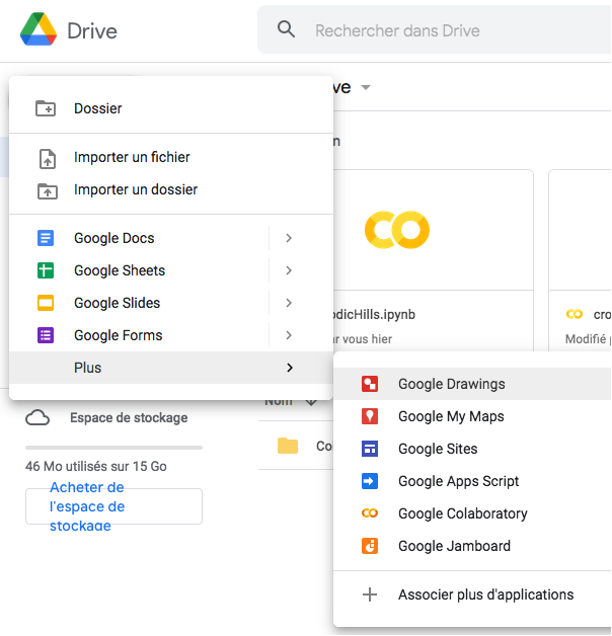

Les fichiers seront stockés dans un répertoire « Colab Notebooks ». Vous pouvez y créer des sous-répertoires les organiser :  

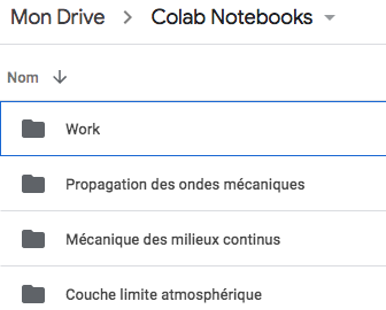

Ces fichiers sont des « Jupyter notebooks » d’extension .ipynb que vous pouvez télécharger, par exemple pour une sauvegarde. Vous pouvez aussi téléverser de tels fichiers après les avoir créés en local, par exemple avec l’application Jupyter de l’interface Anaconda. À partir du Google Drive, vous pouvez partager un lien en permettant à tous les utilisateurs le possédant d’y accéder : 

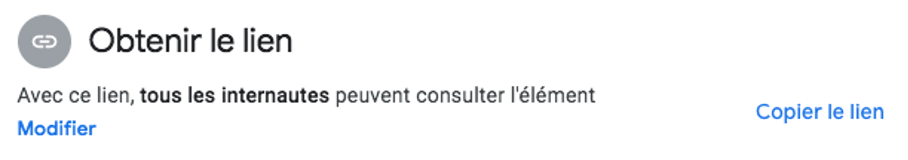


À titre d'exemple, voici un lien vers un Juypter notebook partagé: 

https://colab.research.google.com/drive/13L08PLMGpIXydtijBtvWuJDHIaf1R59V?usp=sharing

Avec ce lien, vous disposez d’une copie de mon Jupyter notebook sur votre compte Google et pouvez, à l’instar des étudiants, modifier le programme comme vous le souhaitez, sans affecter l'original. 

# Comment présenter une fonction

Les Jupyter notebooks permettent de présenter des équations à l'aide de commandes $\LaTeX$ : double-cliquez sur la présente cellule pour visualiser le code source de ce texte !

Nous allons tracer la fonction $f(x)$ suivante : 
$$ f(x) = {1\over \sqrt{2\pi}\; \sigma} \exp\left(-{x^2 \over 2 \sigma^2}\right)\,$$
où $\sigma$ est une constante. Cette fonction peut être vue comme la densité d'une loi de probabilité gaussienne centrée avec $\sigma$ comme écart-type. 

Exécutez les lignes de code Python ci-dessous pour tracer la fonction en modifiant les paramètres suivants :

*   `sigma` : Écart-type $\sigma$ de la gaussienne
*   `L` : Longueur $L$ pour un tracé sur l'intervalle $[-L,L]$







In [ ]:
# Import des bibliothèques 
import numpy as np
import matplotlib.pyplot as plt

# Paramètres à modifier 
sigma=2 # Écart-type
L=10 # Longueur pour le tracé [-L,L]

# Paramètres peu importants
Nx=100 # Nombre de points pour le tracé
ymin=-.1; ymax=.5 # Bornes du tracé sur l'axe y

# Construction des tableaux 
x=np.linspace(-L,L,Nx)
f=(1/np.sqrt(2*np.pi))*np.exp(-x**2/(2*sigma**2))

# Préparation de la figure
plt.figure(1,figsize=(7,5))
plt.xlabel('x',fontsize=16 )
plt.ylabel(r'$f$',fontsize=16)
plt.title("Densité de probabilité gaussienne",fontsize=16)
plt.xlim(-L,L)
plt.ylim(ymin,ymax)
plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
plt.grid(color='black', axis='x', linestyle='-', linewidth=1)

# tracé de la fonction
plt.plot([-L,L],[0,0],'b--',linewidth=2)
plt.plot([0,0],[ymin,ymax],'b--',linewidth=2)
plt.plot(x,f,'k',linewidth=3)

# Comment animer une fonction

Nous allons voir maintenant comment visualiser l'évluation temporelle d'une fonction comme par exemple $\psi(x,t) = {1\over 2} f(x-ct) + {1\over 2} f(x+ct)$ où $c$ est un constante et 
$$ f(x) = {1\over \sqrt{2\pi}\; \sigma} \exp\left(-{x^2 \over 2 \sigma^2}\right)\;.$$

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme !

*   Colab : ⌘/Ctrl+F9 pour tout exécuter.
*   MyBinder : -> Run -> "Run all cells"


## Compilation des sous-programmes

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme !

Pour aller plus vite :
*   Colab : ⌘/Ctrl+F9 pour tout exécuter.
*   MyBinder : -> Run -> "Run all cells"


In [ ]:
# Import de librairies
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fonctions 

def f(x):
  f=(1/np.sqrt(2*np.pi))*np.exp(-x**2/(2*sigma**2))
  return f

def anisimple(i):
  # Signal 
  t=dt*i # temps
  psi=.5*f(x-c*t)+.5*f(x+c*t)
  # Préparation de la figure
  ax.clear()
  ax.set_xlabel('x',fontsize=16 )
  ax.set_ylabel(r'$\psi$',fontsize=16)
  ax.set_title("Deux pulses t="+str(np.round(t,1)),fontsize=16)  
  ax.set_xlim(-L,L)
  ax.set_ylim(ymin,ymax)
  ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
  ax.grid(color='black', axis='x', linestyle='-', linewidth=1) 
  # Tracé de la fonction
  ax.plot(x,psi,color='red',linewidth=3) 

## Paramètres à modifier

Exécutez les lignes de code Python ci-dessous pour tracer la fonction en modifiant les paramètres suivants :

*   `sigma` : Écart-type $\sigma$ de la gaussienne
*   `c` : Vitesse de propagation $c$
*   `Nt` : Nombre d'images pour l'animation
*   `L` : Longueur $L$ pour un tracé sur l'intervalle $[-L,L]$

In [ ]:
# Paramètres à modifier 
sigma=2 # Écart-type
c=1 # Vitesse de propagation
Nt=20 # Nombre d'images pour l'animation
L=12 # Longueur pour le tracé [-L,L]

# Paramètres peu importants
Nx=100 # Nombre de points pour le tracé
ymin=-.1; ymax=.4 # Bornes du tracé sur l'axe y

# Paramètres dérivés
Time=2*(L-sigma)/c;  
dt=Time/Nt

# Construction des tableaux 
x=np.linspace(-L,L,Nx)

# Préparation de la figure 
fig=plt.figure(1,figsize=(7,5))
ax=plt.subplot(1,1,1)

# Lancement de l'animation
print("Simulation pour visualiser l'animation")   
ani=FuncAnimation(fig,anisimple,frames=np.arange(0,Nt),interval=300,repeat=True)
plt.close() 
plt.rc('animation', html='jshtml')
# La commande suivante doit être la dernière de la cellule
ani 

## Commande pour sauver l'animation dans un fichier gif animé

Cliquez sur la cellule ci-dessous pour générer un fichier gif animé, consultable dans la colonne de droite de ce notebook !

In [ ]:
# Commande pour créer un fichier gif animé
print("Simulation pour créer un gif animé")  
ani.save("DeuxPulses.gif",writer="pillow")

Simulation pour créer un gif animé


# GitHub et MyBinder

Ce notebook est sur GitHub sur le repository :
https://github.com/thual/EXILCO-TrucsAstuces

Ce repository contient le fichier `requirements.txt` suivant :

> `matplotlib==3.5.1`

> `numpy==1.21.4`

Le lien sur MyBinder est ici :
https://mybinder.org/v2/gh/thual/EXILCO-TrucsAstuces/HEAD 


# Convertir un Jupyter notebook en LaTeX

Il est possible de convertir un Jupyter notebooks en fichier LaTeX à l'aide des commandes suivantes:

> `conda install pandoc`

> `conda install nbconvert `

> `jupyter nbconvert Atelier_Trucs_et_Astuces.ipynb --to latex`

L'insertion des figures qui ne sont pas générées par les commandes Python du notebook reste un problème technique à explorer. 



